In [67]:
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
raw_data = pd.read_csv('/home/komlan/Downloads/product-list_export_1629444041504.csv').drop(["Unnamed: 0"], axis=1)
raw_data

,Action,Type,Area,Size,Budget,Must,Nice,District
0,RENT,APARTMENT,DISTRICTS,"MEDIUM,LARGE","STANDARD,PREMIUM","Home<br>Appliances,Lift,Exterior,Terrace,Parqu...",NaN,"Eixample,Gracia"
1,SALE,HOUSE,ALL_CITY,SMALL,ECONOMY,"Refurbished,Lift,A/C,Balcony,Inbuilt Wardrobes...",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi..."
2,RENT,APARTMENT,ALL_CITY,"LARGE,XLARGE","PREMIUM,LUXURY","Lift,Terrace,Garage,Parquet Floor",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi..."
3,SALE,APARTMENT,DISTRICTS,MEDIUM,STANDARD,"Terrace,Open Kitchen,Penthouse",NaN,Les Corts
4,RENT,APARTMENT,ALL_CITY,"SMALL,MEDIUM","ECONOMY,STANDARD","Furnished,Home<br>Appliances,Refurbished",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi..."
5,RENT,APARTMENT,ALL_CITY,"SMALL,MEDIUM","ECONOMY,STANDARD,PREMIUM","Furnished,Home<br>Appliances,Refurbished",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi..."
6,RENT,APARTMENT,ALL_CITY,"SMALL,MEDIUM","ECONOMY,STANDARD","Furnished,Home<br>Appliances,Refurbished",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi..."
7,SALE,APARTMENT,DRAW_AREA,XLARGE,"STANDARD,PREMIUM,LUXURY","Lift,A/C,Central Heating,Exterior,Balcony,Terrace",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi..."
8,SALE,APARTMENT,DRAW_AREA,XLARGE,"STANDARD,PREMIUM","Lift,A/C,Central Heating,Exterior,Balcony,Terrace",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi..."
9,SALE,APARTMENT,DRAW_AREA,XLARGE,"STANDARD,PREMIUM,LUXURY","Lift,A/C,Central Heating,Exterior,Terrace,Furn...",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi..."


## Data Processing

In [74]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8851 entries, 0 to 8850
Data columns (total 8 columns):
Action      8851 non-null object
Type        8851 non-null object
Area        8851 non-null object
Size        8388 non-null object
Budget      8847 non-null object
Must        8851 non-null object
Nice        1429 non-null object
District    8851 non-null object
dtypes: object(8)
memory usage: 553.3+ KB


In [75]:
raw_data.describe()

,Action,Type,Area,Size,Budget,Must,Nice,District
count,8851,8851,8851,8388,8847,8851,1429,8851
unique,2,2,3,15,15,3042,516,237
top,SALE,APARTMENT,DISTRICTS,MEDIUM,STANDARD,"Lift,Terrace,Penthouse",Pets Allowed,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi..."
freq,5165,7732,4810,2168,2169,394,127,4114


In [76]:
raw_data.isna().sum()

Action         0
Type           0
Area           0
Size         463
Budget         4
Must           0
Nice        7422
District       0
dtype: int64

In [77]:
raw_data.isnull().sum()

Action         0
Type           0
Area           0
Size         463
Budget         4
Must           0
Nice        7422
District       0
dtype: int64

In [92]:
data = raw_data.dropna(subset = ['Area', 'Size', 'Budget'])
clustered_data = data
data = data[['Area', 'Size', 'Budget']]
clustered_data

,Action,Type,Area,Size,Budget,Must,Nice,District
0,RENT,APARTMENT,DISTRICTS,"MEDIUM,LARGE","STANDARD,PREMIUM","Home<br>Appliances,Lift,Exterior,Terrace,Parqu...",NaN,"Eixample,Gracia"
1,SALE,HOUSE,ALL_CITY,SMALL,ECONOMY,"Refurbished,Lift,A/C,Balcony,Inbuilt Wardrobes...",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi..."
2,RENT,APARTMENT,ALL_CITY,"LARGE,XLARGE","PREMIUM,LUXURY","Lift,Terrace,Garage,Parquet Floor",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi..."
3,SALE,APARTMENT,DISTRICTS,MEDIUM,STANDARD,"Terrace,Open Kitchen,Penthouse",NaN,Les Corts
4,RENT,APARTMENT,ALL_CITY,"SMALL,MEDIUM","ECONOMY,STANDARD","Furnished,Home<br>Appliances,Refurbished",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi..."
5,RENT,APARTMENT,ALL_CITY,"SMALL,MEDIUM","ECONOMY,STANDARD,PREMIUM","Furnished,Home<br>Appliances,Refurbished",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi..."
6,RENT,APARTMENT,ALL_CITY,"SMALL,MEDIUM","ECONOMY,STANDARD","Furnished,Home<br>Appliances,Refurbished",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi..."
7,SALE,APARTMENT,DRAW_AREA,XLARGE,"STANDARD,PREMIUM,LUXURY","Lift,A/C,Central Heating,Exterior,Balcony,Terrace",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi..."
8,SALE,APARTMENT,DRAW_AREA,XLARGE,"STANDARD,PREMIUM","Lift,A/C,Central Heating,Exterior,Balcony,Terrace",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi..."
9,SALE,APARTMENT,DRAW_AREA,XLARGE,"STANDARD,PREMIUM,LUXURY","Lift,A/C,Central Heating,Exterior,Terrace,Furn...",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi..."


In [93]:
clustered_data.isna().sum()

Action         0
Type           0
Area           0
Size           0
Budget         0
Must           0
Nice        7019
District       0
dtype: int64

In [94]:
data.shape

(8384, 3)

### Areas

/home/komlan/pythonEnv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


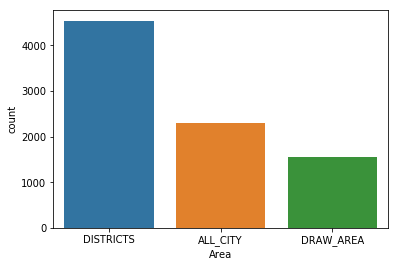

In [95]:
sns.countplot(data["Area"])

### Size

/home/komlan/pythonEnv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


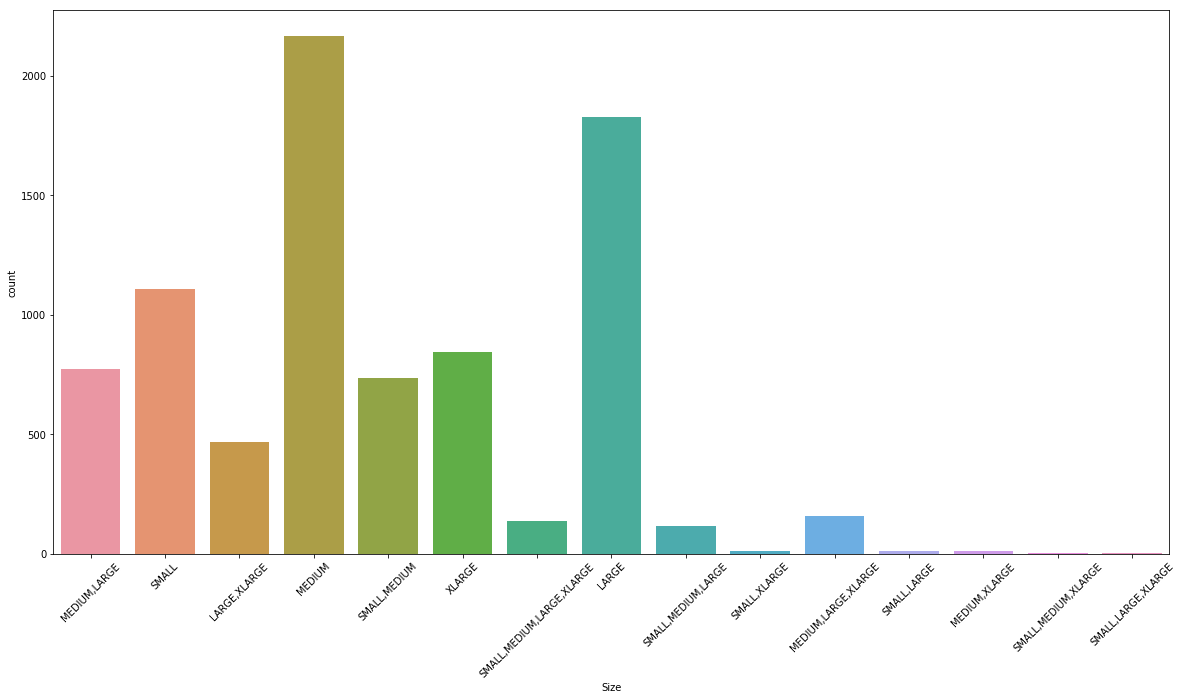

In [96]:
fig, ax = plt.subplots(figsize=(20, 10))
chart = sns.countplot(data["Size"], ax=ax)
a = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

### Budget

/home/komlan/pythonEnv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


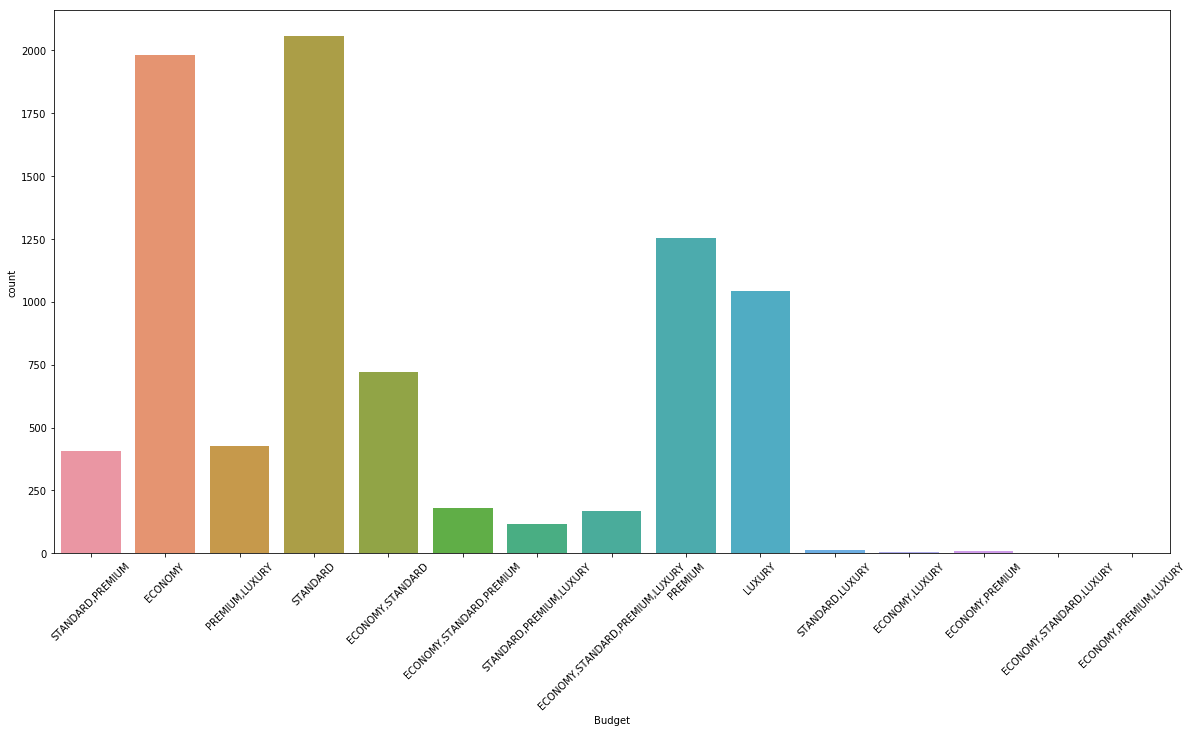

In [97]:
fig, ax = plt.subplots(figsize=(20, 10))
chart = sns.countplot(data["Budget"], ax=ax)
b = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [98]:
data["nb_customer"] = 0
group_data = data.groupby(["Size","Budget","Area"], as_index=False).count()
group_data

/home/komlan/pythonEnv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Size,Budget,Area,nb_customer
0,LARGE,ECONOMY,ALL_CITY,71
1,LARGE,ECONOMY,DISTRICTS,109
2,LARGE,ECONOMY,DRAW_AREA,75
3,LARGE,"ECONOMY,PREMIUM",DISTRICTS,2
4,LARGE,"ECONOMY,STANDARD",ALL_CITY,13
5,LARGE,"ECONOMY,STANDARD",DISTRICTS,33
6,LARGE,"ECONOMY,STANDARD",DRAW_AREA,11
7,LARGE,"ECONOMY,STANDARD,PREMIUM",ALL_CITY,4
8,LARGE,"ECONOMY,STANDARD,PREMIUM",DISTRICTS,16
9,LARGE,"ECONOMY,STANDARD,PREMIUM",DRAW_AREA,1


# Clustering with: K Modes

In [99]:
data_ = data[["Size","Budget","Area"]]

In [100]:
# Since all features are catégorial let's convert the dataframe to numpy array
catColumns = data_.columns.values.tolist()
data_matrix = data_.values
data_matrix

array([['MEDIUM,LARGE', 'STANDARD,PREMIUM', 'DISTRICTS'],
       ['SMALL', 'ECONOMY', 'ALL_CITY'],
       ['LARGE,XLARGE', 'PREMIUM,LUXURY', 'ALL_CITY'],
       ...,
       ['SMALL', 'STANDARD', 'DISTRICTS'],
       ['SMALL', 'ECONOMY', 'ALL_CITY'],
       ['MEDIUM', 'STANDARD', 'ALL_CITY']], dtype=object)

## Validation of the optimal value of K

### The Elbow Method: Avarage within cluster sum of square

$$ \sum _{i=1}^{K} \sum _{j=1}^{ni} \frac{X_{ij}-X_{i})^2}{N}$$

$$ Soit l' hyperplant (P): w^T x+b=0,w∈R^p,b∈R $$
$$ Soit f(x)= w^T x+b $$
$$y_i∈{-1,1},i∈{0,n}$$
$${█(if y_i=1=> w^T x+b≥1  (top side)@if y_i=-1=> w^T x+b≤-1 (bottom side) )┤$$
$$$$
$$$$
$$$$
$$J=γ‖w‖^2+1/n ∑_(i=1)^n (Max(0,1- y_i (w^T x+b))= γ‖w‖^2+1/n ∑_(i=1)^n〖Max(0,1-〗 y_i f(x))$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$


In [101]:
# Choosing optimal K
cost = []
for cluster in range(1, 10):
    try:
        kmodes = KModes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kmodes.fit_predict(data_matrix)
        cost.append(kmodes.cost_)
    except:
        break

In [102]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':list(range(1, 10)), 'Cost':cost})


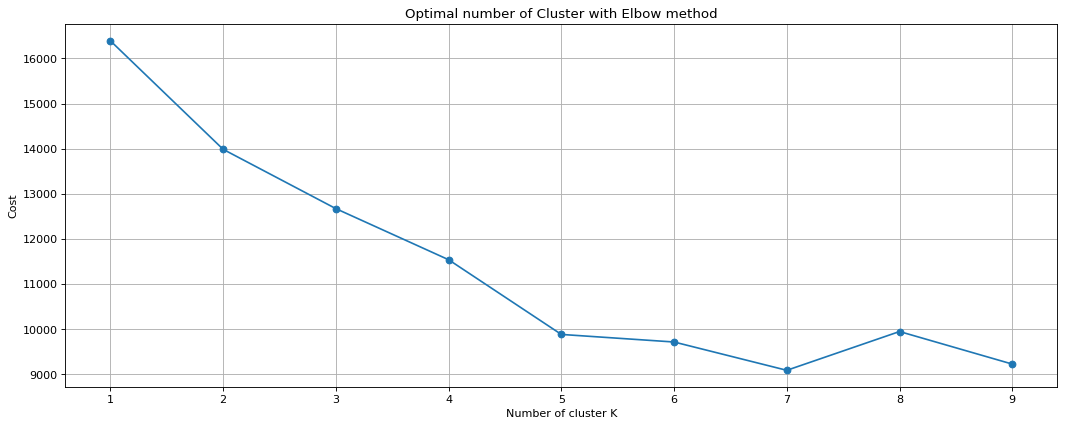

In [103]:
figure(figsize=(16, 6), dpi=80)

plt.title("Optimal number of Cluster with Elbow method")
plt.xlabel("Number of cluster K")
plt.ylabel("Cost")

plt.plot(df_cost["Cluster"].values, df_cost["Cost"].values, 'o-')

plt.grid()
plt.show()

## Let's choose  K=5

In [104]:
#I choose K=5: the error looks almost constance after the number of cluster 5

In [105]:
#help(KModes)

In [106]:
kmodes_optimal = KModes(n_jobs = -1, n_clusters = 5, init = 'Huang', random_state = 0)
clusters = kmodes_optimal.fit_predict(data_matrix)
# Display centroids
kmodes_optimal.cluster_centroids_ #50

array([['MEDIUM', 'STANDARD', 'ALL_CITY'],
       ['SMALL', 'ECONOMY', 'DRAW_AREA'],
       ['XLARGE', 'LUXURY', 'DISTRICTS'],
       ['LARGE', 'PREMIUM', 'DISTRICTS'],
       ['MEDIUM', 'ECONOMY', 'DISTRICTS']], dtype='<U9')

In [107]:
print(clusters)

[2 1 0 ... 0 1 0]


In [115]:
#reduced_data = pd.DataFrame(data_matrix, columns=["Size","Budget","Area"])

clustered_data["clusters"] = clusters
#reduced_data.sort_values(by=["label"], ascending=True, inplace=True)
clustered_data

/home/komlan/pythonEnv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Action,Type,Area,Size,Budget,Must,Nice,District,label,clusters
0,RENT,APARTMENT,DISTRICTS,"MEDIUM,LARGE","STANDARD,PREMIUM","Home<br>Appliances,Lift,Exterior,Terrace,Parqu...",NaN,"Eixample,Gracia",2,2
1,SALE,HOUSE,ALL_CITY,SMALL,ECONOMY,"Refurbished,Lift,A/C,Balcony,Inbuilt Wardrobes...",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi...",1,1
2,RENT,APARTMENT,ALL_CITY,"LARGE,XLARGE","PREMIUM,LUXURY","Lift,Terrace,Garage,Parquet Floor",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi...",0,0
3,SALE,APARTMENT,DISTRICTS,MEDIUM,STANDARD,"Terrace,Open Kitchen,Penthouse",NaN,Les Corts,0,0
4,RENT,APARTMENT,ALL_CITY,"SMALL,MEDIUM","ECONOMY,STANDARD","Furnished,Home<br>Appliances,Refurbished",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi...",0,0
5,RENT,APARTMENT,ALL_CITY,"SMALL,MEDIUM","ECONOMY,STANDARD,PREMIUM","Furnished,Home<br>Appliances,Refurbished",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi...",0,0
6,RENT,APARTMENT,ALL_CITY,"SMALL,MEDIUM","ECONOMY,STANDARD","Furnished,Home<br>Appliances,Refurbished",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi...",0,0
7,SALE,APARTMENT,DRAW_AREA,XLARGE,"STANDARD,PREMIUM,LUXURY","Lift,A/C,Central Heating,Exterior,Balcony,Terrace",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi...",1,1
8,SALE,APARTMENT,DRAW_AREA,XLARGE,"STANDARD,PREMIUM","Lift,A/C,Central Heating,Exterior,Balcony,Terrace",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi...",1,1
9,SALE,APARTMENT,DRAW_AREA,XLARGE,"STANDARD,PREMIUM,LUXURY","Lift,A/C,Central Heating,Exterior,Terrace,Furn...",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi...",1,1


Since we are not in case of supervised learning (the true labels are not provided) the model is valideted by using Elbow method. 
Based on the elbow curve, we decied the optimal value that will help us to cluster more correctly the dataset. 

Silhouette method:
One other way to validate the model is applying Silhouette method. This need to follow three steps:
$$ a(i)={\frac {1}{|C_{i}|-1}}\sum _{j\in C_{i},i\neq j}d(i,j)$$
    https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
        

In [116]:
#https://en.wikipedia.org/wiki/Silhouette_(clustering)

In [118]:
group_data = clustered_data.groupby(["clusters"], as_index=False).agg(lambda col: ','.join(col))
nb_users = clustered_data.groupby(["clusters"], as_index=False).count()
group_data["nb_customer"] = nb_users["Action"].values
group_data

,clusters,Action,Type,Area,Size,Budget,Must,District,nb_customer
0,0,"RENT,SALE,RENT,RENT,RENT,RENT,SALE,SALE,SALE,S...","APARTMENT,APARTMENT,APARTMENT,APARTMENT,APARTM...","ALL_CITY,DISTRICTS,ALL_CITY,ALL_CITY,ALL_CITY,...","LARGE,XLARGE,MEDIUM,SMALL,MEDIUM,SMALL,MEDIUM,...","PREMIUM,LUXURY,STANDARD,ECONOMY,STANDARD,ECONO...","Lift,Terrace,Garage,Parquet Floor,Terrace,Open...","Eixample,Gracia,Les Corts,Sarriá - St. Gervasi...",3225
1,1,"SALE,SALE,SALE,SALE,RENT,SALE,SALE,SALE,RENT,S...","HOUSE,APARTMENT,APARTMENT,APARTMENT,APARTMENT,...","ALL_CITY,DRAW_AREA,DRAW_AREA,DRAW_AREA,DRAW_AR...","SMALL,XLARGE,XLARGE,XLARGE,SMALL,MEDIUM,LARGE,...","ECONOMY,STANDARD,PREMIUM,LUXURY,STANDARD,PREMI...","Refurbished,Lift,A/C,Balcony,Inbuilt Wardrobes...","Eixample,Gracia,Les Corts,Sarriá - St. Gervasi...",1547
2,2,"RENT,SALE,RENT,SALE,SALE,SALE,SALE,SALE,SALE,S...","APARTMENT,APARTMENT,APARTMENT,APARTMENT,APARTM...","DISTRICTS,ALL_CITY,DISTRICTS,DISTRICTS,DISTRIC...","MEDIUM,LARGE,XLARGE,SMALL,MEDIUM,LARGE,XLARGE,...","STANDARD,PREMIUM,LUXURY,ECONOMY,STANDARD,PREMI...","Home<br>Appliances,Lift,Exterior,Terrace,Parqu...","Eixample,Gracia,Eixample,Gracia,Les Corts,Sarr...",1583
3,3,"SALE,SALE,SALE,SALE,SALE,SALE,SALE,RENT,SALE,R...","APARTMENT,APARTMENT,APARTMENT,HOUSE,HOUSE,APAR...","DISTRICTS,DISTRICTS,ALL_CITY,ALL_CITY,ALL_CITY...","LARGE,LARGE,LARGE,LARGE,LARGE,LARGE,LARGE,LARG...","PREMIUM,STANDARD,PREMIUM,PREMIUM,PREMIUM,STAND...","Refurbished,Terrace,Parquet Floor,Open Kitchen...","Eixample,Eixample,Eixample,Gracia,Les Corts,Sa...",1415
4,4,"SALE,RENT,SALE,SALE,SALE,RENT,RENT,RENT,RENT,R...","APARTMENT,APARTMENT,APARTMENT,APARTMENT,APARTM...","DISTRICTS,DISTRICTS,DISTRICTS,DISTRICTS,DISTRI...","MEDIUM,MEDIUM,MEDIUM,MEDIUM,MEDIUM,MEDIUM,MEDI...","STANDARD,PREMIUM,ECONOMY,STANDARD,ECONOMY,STAN...","Refurbished,Lift,A/C,Central Heating,New,Home<...","Nou barris,Sants,Eixample,Ciutat Vella,Horta -...",614


In [120]:
common_property = group_data[["clusters","Must","nb_customer"]]
common_property

,clusters,Must,nb_customer
0,0,"Lift,Terrace,Garage,Parquet Floor,Terrace,Open...",3225
1,1,"Refurbished,Lift,A/C,Balcony,Inbuilt Wardrobes...",1547
2,2,"Home<br>Appliances,Lift,Exterior,Terrace,Parqu...",1583
3,3,"Refurbished,Terrace,Parquet Floor,Open Kitchen...",1415
4,4,"Refurbished,Lift,A/C,Central Heating,New,Home<...",614


In [123]:
def most_common(row):
    li = row[1].split(',')
    uniques  = list(set(li))
    ocurrences = [[el, li.count(el)] for el in uniques]
    top_5_ocurrences = sorted(ocurrences, key=lambda x: x[1])[:-6:-1] # make the reverse and get the top 5 
    for i in range(len(top_5_ocurrences)):
        top_5_ocurrences[i][1] = str(round((top_5_ocurrences[i][1]/row[2])*100,2))+"%"
    return top_5_ocurrences

common_property["top_5_most_common_property"] = common_property.apply(lambda x: most_common(x), axis=1)
common_property

/home/komlan/pythonEnv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,clusters,Must,nb_customer,top_5_most_common_property
0,0,"Lift,Terrace,Garage,Parquet Floor,Terrace,Open...",3225,"[[Terrace, 57.12%], [Lift, 52.34%], [Exterior,..."
1,1,"Refurbished,Lift,A/C,Balcony,Inbuilt Wardrobes...",1547,"[[Terrace, 49.0%], [Lift, 40.53%], [Exterior, ..."
2,2,"Home<br>Appliances,Lift,Exterior,Terrace,Parqu...",1583,"[[Terrace, 66.52%], [Lift, 60.01%], [A/C, 37.9..."
3,3,"Refurbished,Terrace,Parquet Floor,Open Kitchen...",1415,"[[Terrace, 68.48%], [Lift, 66.29%], [Central H..."
4,4,"Refurbished,Lift,A/C,Central Heating,New,Home<...",614,"[[Terrace, 59.77%], [Lift, 57.49%], [Exterior,..."


In [128]:
for i, row in common_property.iterrows():
    print("Cluster ",row.values[0])
    print("\t -->",row.values[3])

Cluster  0
	 --> [['Terrace', '57.12%'], ['Lift', '52.34%'], ['Exterior', '32.65%'], ['Refurbished', '30.48%'], ['A/C', '28.53%']]
Cluster  1
	 --> [['Terrace', '49.0%'], ['Lift', '40.53%'], ['Exterior', '34.84%'], ['Furnished', '30.64%'], ['Refurbished', '27.67%']]
Cluster  2
	 --> [['Terrace', '66.52%'], ['Lift', '60.01%'], ['A/C', '37.9%'], ['Central Heating', '37.02%'], ['Refurbished', '35.0%']]
Cluster  3
	 --> [['Terrace', '68.48%'], ['Lift', '66.29%'], ['Central Heating', '38.09%'], ['A/C', '33.64%'], ['Refurbished', '32.58%']]
Cluster  4
	 --> [['Terrace', '59.77%'], ['Lift', '57.49%'], ['Exterior', '35.18%'], ['Balcony', '32.25%'], ['Refurbished', '26.87%']]


In [130]:
clustered_data[clustered_data["clusters"]==4]

,Action,Type,Area,Size,Budget,Must,Nice,District,label,clusters
39,SALE,APARTMENT,DISTRICTS,MEDIUM,"STANDARD,PREMIUM","Refurbished,Lift,A/C,Central Heating,New","Double Glazed Windows,Storey","Nou barris,Sants",4,4
40,RENT,APARTMENT,DISTRICTS,MEDIUM,"ECONOMY,STANDARD","Home<br>Appliances,Exterior,Balcony,Terrace",NaN,"Eixample,Ciutat Vella,Horta - Guinardó",4,4
113,SALE,APARTMENT,DISTRICTS,MEDIUM,"ECONOMY,STANDARD,PREMIUM","Refurbished,Lift,Exterior,Balcony,Garage",NaN,"Eixample,Sarriá - St. Gervasi",4,4
139,SALE,APARTMENT,DISTRICTS,MEDIUM,"ECONOMY,STANDARD,PREMIUM,LUXURY","Refurbished,A/C,Exterior,Balcony,Terrace,Parqu...",NaN,Les Corts,4,4
140,SALE,APARTMENT,DISTRICTS,MEDIUM,"ECONOMY,STANDARD","Refurbished,Exterior,Terrace",NaN,Les Corts,4,4
200,RENT,APARTMENT,DISTRICTS,MEDIUM,"ECONOMY,STANDARD","Balcony,Terrace,Without<br>Furnitures",NaN,Ciutat Vella,4,4
201,RENT,APARTMENT,DISTRICTS,MEDIUM,"ECONOMY,STANDARD","Lift,Terrace,Without<br>Furnitures",NaN,Ciutat Vella,4,4
202,RENT,APARTMENT,DISTRICTS,MEDIUM,"ECONOMY,STANDARD","Lift,Exterior,Balcony,Terrace,Without<br>Furni...",NaN,Ciutat Vella,4,4
209,RENT,APARTMENT,DISTRICTS,MEDIUM,"ECONOMY,STANDARD","Home<br>Appliances,Terrace,Without<br>Furnitures",NaN,"Les Corts,Sarriá - St. Gervasi",4,4
211,RENT,APARTMENT,DISTRICTS,MEDIUM,"ECONOMY,STANDARD","Lift,Balcony,Terrace",NaN,Les Corts,4,4
